<a href="https://colab.research.google.com/github/OdysseusPolymetis/colabs_for_nlp/blob/main/5_exemples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXEMPLES AVEC L'ANALYSE AUTOMATIQUE**

In [ ]:
!pip install stanza

In [ ]:
import stanza
stanza.download('fr')

In [ ]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma,ner')

In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/colabs_for_nlp/refs/heads/main/miserables.txt

In [5]:
filepath_of_text = "/content/miserables.txt"

In [6]:
full_text = open(filepath_of_text, encoding="utf-8").read()

Cette partie-là est un peu longue (en moyenne 6-7 minutes)

In [7]:
miserables_stanza=nlp_stanza(full_text)

In [18]:
lemmas = [token.lemma for sent in miserables_stanza.sentences for token in sent.words if token.lemma is not None]

In [19]:
print(len(lemmas))

654336


In [20]:
print(lemmas[20:40])

['environ', 'soixante-quinze', 'an', ';', 'lui', 'occuper', 'le', 'siège', 'de', 'Digne', 'depuis', '1806', '.', 'quoique', 'ce', 'détail', 'ne', 'toucher', 'en', 'aucun']


In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopset = set(stopwords.words('french'))
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
hugo_text = nltk.Text(lemmas)

In [ ]:
hugo_text.concordance("Valjean")

In [ ]:
bcf = BigramCollocationFinder.from_words(lemmas)
filter_stops = lambda w: len(w) < 3 or w in stopset
bcf.apply_word_filter(filter_stops)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

<Figure size 2000x1000 with 0 Axes>

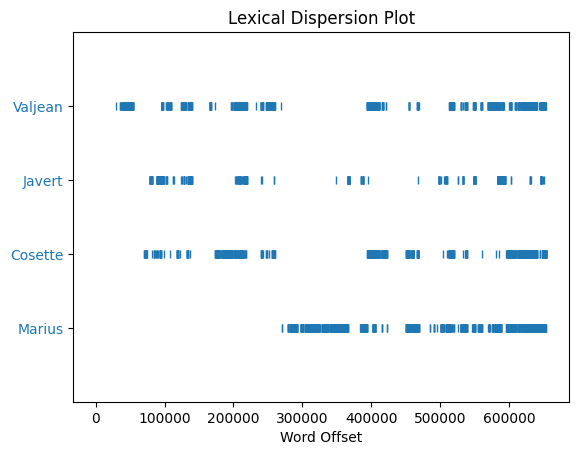

In [27]:
plt.figure(figsize=(20, 10))
hugo_text.dispersion_plot(['Valjean', 'Javert', 'Cosette', 'Marius'])

In [28]:
import pandas as pd

In [29]:
def word_info_df(doc):
    """
    - Parameters: doc (a Stanza Document object)
    - Returns: A Pandas DataFrame object with one row for each token in
      doc, and columns for text, lemma, upos, and xpos.
    """
    rows = []
    for sentence in doc.sentences:
        for token, word in zip(sentence.tokens, sentence.words):
            row = {
                "text": word.text,
                "lemma": word.lemma,
                "upos": word.upos,
                "ent": token.ner
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [30]:
stanza_dataframe = word_info_df(miserables_stanza)

In [ ]:
headers = list(stanza_dataframe.columns)
print("voici les titres de colonnes : "+ str(headers))
print(stanza_dataframe)

In [32]:
from stanza.models.common.doc import StanzaObject
stanza_dataframe.to_csv('/content/miserables.csv', encoding='utf-8')

In [33]:
stanza_dataframe['upos'].value_counts()

,count
upos,
NOUN,108088
DET,88545
PUNCT,86317
VERB,74488
ADP,72870
PRON,72823
ADV,34269
ADJ,29797
AUX,22939


In [34]:
stanza_dataframe['lemma'].value_counts()

,count
lemma,
le,53437
",",43811
de,33231
.,23065
lui,21826
...,...
Dumolard,1
Minerve_,1
Sournoise!,1


In [35]:
tmp=stanza_dataframe['ent'].value_counts()[1:].to_frame()
print(tmp)

        count
ent          
S-PER    9622
S-LOC    3662
B-PER    2961
E-PER    2961
E-MISC   1447
B-MISC   1447
B-LOC    1132
E-LOC    1132
I-LOC     755
I-MISC    714
S-MISC    515
I-PER     510
I-ORG     120
B-ORG      75
E-ORG      75
S-ORG      26


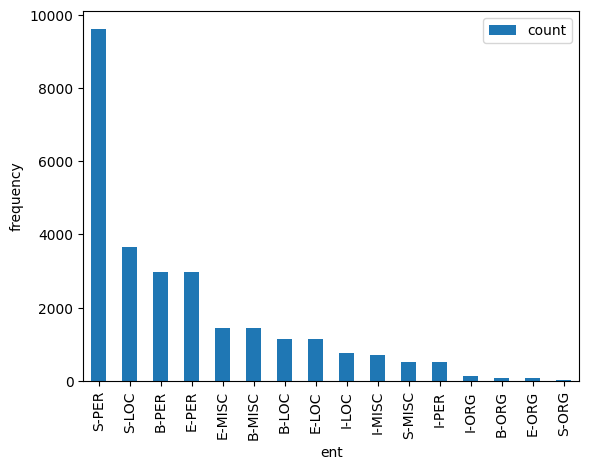

In [36]:
fig,ax = plt.subplots()
tmp.plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

In [37]:
tmp=stanza_dataframe['upos'].value_counts().to_frame()

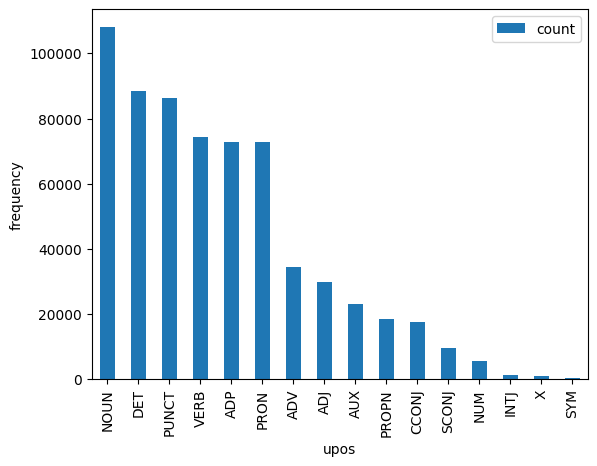

In [38]:
fig,ax = plt.subplots()
tmp.plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

#**QUE FAIRE UNE FOIS QU'ON A FAIT L'ANALYSE : EXEMPLES**

##**Nuages de mots**

In [46]:
from lxml import etree as ET
import string
import sys

In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/colabs_for_nlp/refs/heads/main/stopwords_fr.txt

In [ ]:
!wget https://raw.githubusercontent.com/OdysseusPolymetis/colabs_for_nlp/refs/heads/main/rouge_et_noir.xml

In [42]:
stopwords=list()
stop = open("/content/stopwords_fr.txt", 'r')
for word in stop.read().split("\n"):
    stopwords.append(word)

In [48]:
rouge_et_noir = "/content/rouge_et_noir.xml"

In [49]:
def strip_ns_prefix(tree):
    for element in tree.xpath('descendant-or-self::*'):
        if element.prefix:
            element.tag = ET.QName(element).localname
    return tree

In [50]:
tree = ET.parse(rouge_et_noir)
root = strip_ns_prefix(tree.getroot())
elems = root.findall(".//wf[@lemma]")
words = list()
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"]:
        words.append(elem.attrib["lemma"])

In [ ]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [53]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(words))

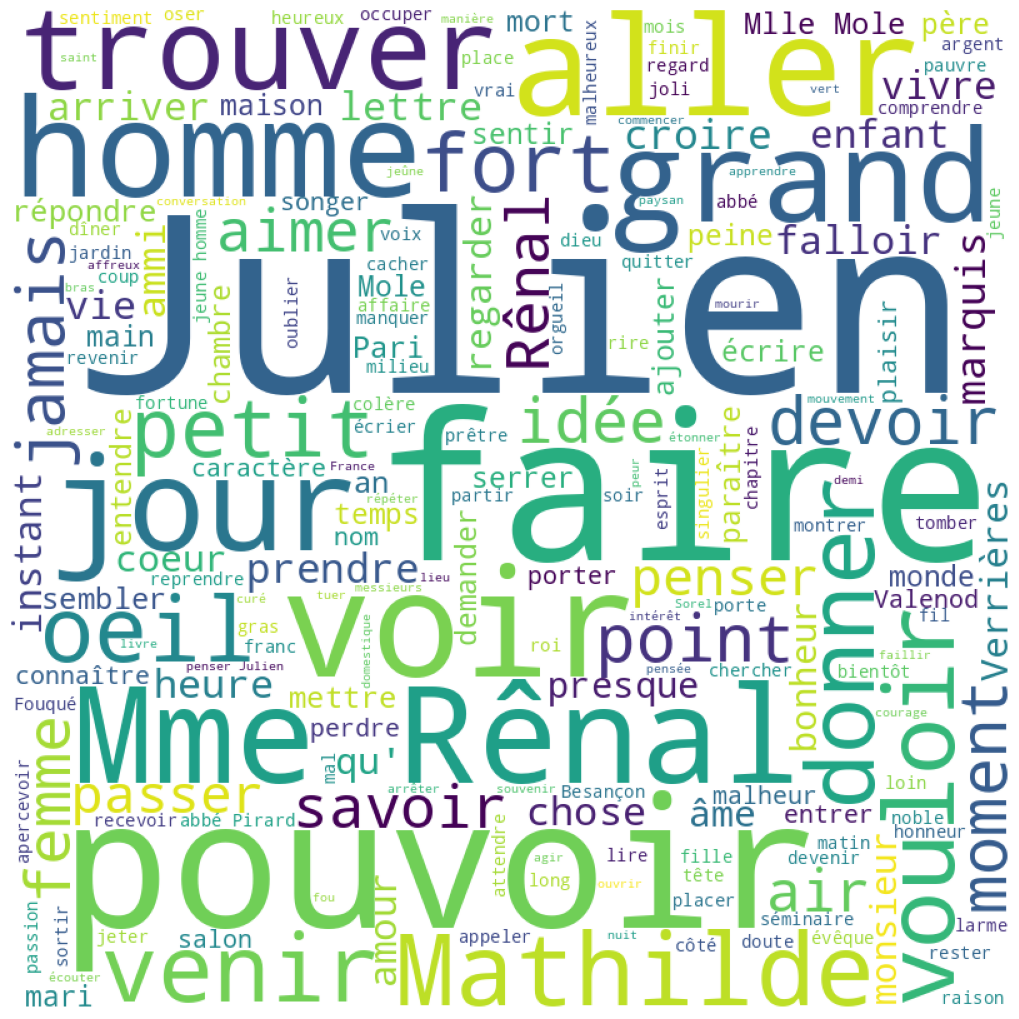

In [54]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##**Réseaux**

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import networkx as nx

In [56]:
names = set()
words = list()
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"]:
        words.append(elem.attrib["lemma"].lower())
for elem in elems:
    if elem.attrib["lemma"] not in string.punctuation and elem.attrib["lemma"] not in stopwords and "&quot;" not in elem.attrib["lemma"] and elem.attrib["pos"]=="NP":
        names.add(elem.attrib["lemma"].lower())

In [57]:
voc = dict()
i=0
for name in names :
    voc[name]=i
    i+=1
print(voc)

{'montmirail': 0, 'bertuccio': 1, 'russie': 2, 'vienne': 3, 'faliero': 4, 'carnot': 5, 'richemond': 6, 'haut': 7, 'henri': 8, 'constantin': 9, 'provence': 10, 'anti-sympathie': 11, 'folke': 12, 'montesson': 13, 'saint-': 14, 'durand': 15, 'autriche': 16, 'bâton': 17, 'nuremberg': 18, 'new-york': 19, 'alger': 20, 'suisse': 21, 'barême': 22, 'dubois': 23, 'collé': 24, 'vésuve': 25, 'coconasso': 26, 'agde': 27, 'beauharnais': 28, 'martial': 29, 'babylone': 30, 'roland': 31, 'fayette': 32, 'conti': 33, 'massillon': 34, 'saint-cyr': 35, 'villequier': 36, 'beaucoup': 37, 'castries': 38, 'lavalette': 39, 'bonaventure': 40, 'élisa': 41, 'waterloo': 42, 'navarre': 43, 'lodi': 44, 'bouillon': 45, 'moirod': 46, 'hercule': 47, 'mole': 48, 'nil': 49, 'pimentel': 50, 'molière': 51, 'caroline': 52, 'bernard': 53, 'baylen': 54, 'bordeaux': 55, 'paul': 56, 'louis xvi': 57, 'richelieu': 58, 'm': 59, 'brougham': 60, 'arcole': 61, 'seine': 62, 'voltaire': 63, 'corneille': 64, 'diego': 65, 'condé': 66, 'ta

In [58]:
cv = CountVectorizer(ngram_range=(1,1), vocabulary=voc)

In [59]:
def chunking(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [60]:
bits=chunking(words,100)
sublists=[' '.join(sub_list) for sub_list in bits]

In [61]:
X = cv.fit_transform(sublists)
Xc = (X.T * X)
Xc.setdiag(0)

In [62]:
cols = cv.get_feature_names_out()
df = pd.DataFrame(data = Xc.toarray(), columns = cols, index = cols)

In [63]:
G = nx.Graph()
G = nx.from_pandas_adjacency(df)

In [64]:
nx.write_gexf(G, "rouge_et_noir.gexf")

# Expérience légèrement différente avec un Transformer

In [2]:
from lxml import etree as ET
import string
import pandas as pd
import networkx as nx
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from sklearn.feature_extraction.text import CountVectorizer
import unicodedata
from collections import defaultdict, Counter

In [65]:
def strip_ns_prefix(tree):
    for element in tree.xpath('descendant-or-self::*'):
        if element.prefix:
            element.tag = ET.QName(element).localname
    return tree

model = AutoModelForTokenClassification.from_pretrained("cmarkea/distilcamembert-base-ner")
tokenizer = AutoTokenizer.from_pretrained("cmarkea/distilcamembert-base-ner")
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

tree = ET.parse("rouge_et_noir.xml")
root = strip_ns_prefix(tree.getroot())
elems = root.findall(".//wf[@lemma]")
words = [elem.attrib["lemma"] for elem in elems if elem.attrib["lemma"] not in string.punctuation]

entities = []
for i in range(0, len(words), 100):
    chunk = " ".join(words[i:i+100])
    for entity in ner_pipeline(chunk):
        if 'PER' in entity['entity_group']:
            entities.append(entity['word'].strip())

cv = CountVectorizer(lowercase=False)
X = cv.fit_transform([' '.join(entities[i:i+100]) for i in range(0, len(entities), 100)])
Xc = (X.T * X)
Xc.setdiag(0)
df = pd.DataFrame(data=Xc.toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

def merge_entities_after(df, entities):
    merged = df.copy()
    for main_entity in sorted(entities, key=len, reverse=True):
        for other_entity in entities:
            if main_entity != other_entity and other_entity in main_entity:
                if other_entity in merged.index and main_entity in merged.index:
                    merged.loc[main_entity] += merged.loc[other_entity]
                    merged.drop(index=other_entity, columns=other_entity, inplace=True, errors='ignore')
    return merged

final_df = merge_entities_after(df, entities)

G = nx.from_pandas_adjacency(final_df)
nx.write_gexf(G, "rouge_et_noir.gexf")
print("Fréquences ajustées des noms les plus présents :", final_df.sum(axis=1).sort_values(ascending=False))


Device set to use cuda:0


Fréquences ajustées des noms les plus présents : Julien         164948
de             151566
Rênal           81210
Mme             77552
Charlemagne     62713
                ...  
laquais           119
Hoche             119
fort              119
rier              119
ah                117
Length: 362, dtype: int64
